# Overview
The **objective** of this notebook is to visualize the data assimilation results generated from [the DART_PFLOTRAN_Integrate notebook](./DART_PFLOTRAN_Integrate.ipynb):

<a id='parameter'></a>
# Configuration

In [1]:
import os
import sys
import h5py
import pickle
import f90nml
import subprocess
import numpy as np
from math import floor
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import gridspec
# plt.rcParams['figure.constrained_layout.use'] = True
%load_ext autoreload
%autoreload 2

****************
**Define the locations of application folder, DART-PFLOTRAN interface folder, and the configuation file of interest**

In [26]:
# Main directory names
# app_par_dir  = "/Users/jian449/Codes/DART/manhattan/models/pflotran/applications"
# app_dir_name = "1dthermal_parastate_1month_1mda"
# app_dir      = os.path.join(app_par_dir, app_dir_name)          # The application folder name
# dart_dir     = "/Users/jian449/Codes/DART/manhattan"
# dart_pf_dir  = "/Users/jian449/Codes/DART/manhattan/models/pflotran"     # The dart pflotran utitlity folder name
# fig_dir      = "/Users/jian449/OneDrive - PNNL/Documents/Publications/2020DART_PFLOTRAN/simulation_plots"

app_par_dir  = "/mnt/4tbb/peishi/1dthermal_simulation/for_publication"
app_dir_name = "1dthermal_parastate_1month_1mda"
app_dir      = os.path.join(app_par_dir, app_dir_name)          # The application folder name
dart_dir     = "/home/jian449/DART/manhattan"
dart_pf_dir  = "/home/jian449/DART/manhattan/models/pflotran"     # The dart pflotran utitlity folder name
# fig_dir      = "/Users/jian449/OneDrive - PNNL/Documents/Publications/2020DART_PFLOTRAN/simulation_plots"

# Get the configuration file
config_file  = os.path.join(app_dir, "work/config.nml")

# Plot time offset (omitting the first several records)
plot_time_offset1, plot_time_offset2 = 576, 48

****************
**Change the locations of the all the files saved in the original config_file according to the new defined locations if necessary (this is used for the case that the application folder is moved/copied from another location)**

In [3]:
change_path_name_files = os.path.join(dart_pf_dir, "utils/change_file_paths_in_confignml.py")
subprocess.run("python {} {} {} {}".format(change_path_name_files, config_file, dart_pf_dir, app_dir),
               shell=True, check=True)


CompletedProcess(args='python /home/jian449/DART/manhattan/models/pflotran/utils/change_file_paths_in_confignml.py /mnt/4tbb/peishi/1dthermal_simulation/for_publication/1dthermal_parastate_1month_1mda/work/config.nml /home/jian449/DART/manhattan/models/pflotran /mnt/4tbb/peishi/1dthermal_simulation/for_publication/1dthermal_parastate_1month_1mda', returncode=0)

****************
**Import the visualization functions**

In [4]:
sys.path.append(dart_pf_dir)
from utils.plot_da_result import DaResults
dar = DaResults(config_file)
dar.setup()
nvar = dar.nvar

<a id='plot_spatial_average'></a>
# Visualize spatial average results

/home/jian449/software/anaconda3/envs/geosci/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  func(*args, **kwargs)
/home/jian449/software/anaconda3/envs/geosci/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


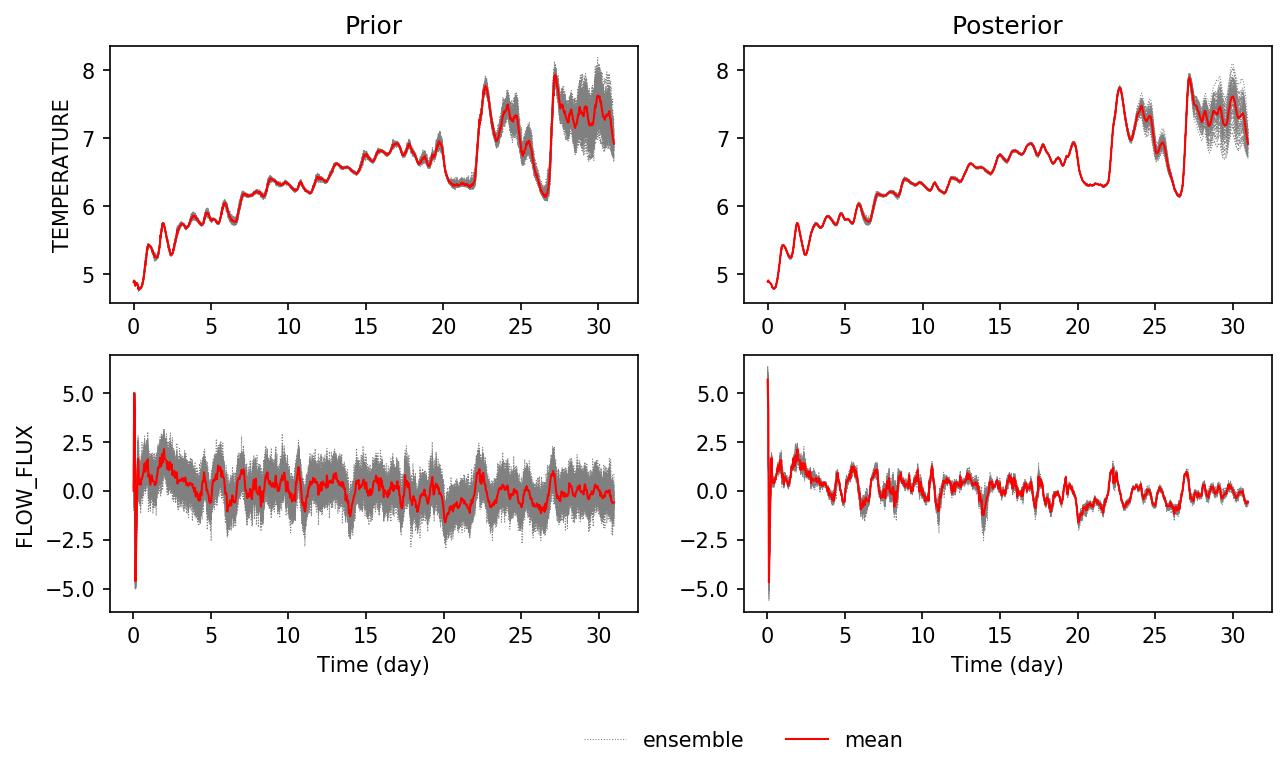

In [5]:
fig = plt.figure(num=1,dpi=150, figsize=(10,5), constrained_layout=True)
gs = gridspec.GridSpec(nvar, 2, width_ratios=[1, 1])
axes = np.empty([nvar, 2], dtype=object)
for i in range(nvar):
    axes[i, 0] = plt.subplot(gs[i, 0])
    axes[i, 1] = plt.subplot(gs[i, 1], sharey=axes[i, 0], sharex=axes[i, 0])
dar.plot_spatial_average(axes)

<a id='plot_along_zaxis'></a>
# Visualize the updated results against the assimilated observation

In [6]:
nloc_obs = len(dar.obs_loc_set)

The observation location of interest is [ 0.    0.   -0.05]
The corresponding model grid is [ 0.    0.   -0.05]
The observation location of interest is [ 0.    0.   -0.15]
The corresponding model grid is [ 0.    0.   -0.15]
The observation location of interest is [ 0.    0.   -0.25]
The corresponding model grid is [ 0.    0.   -0.25]


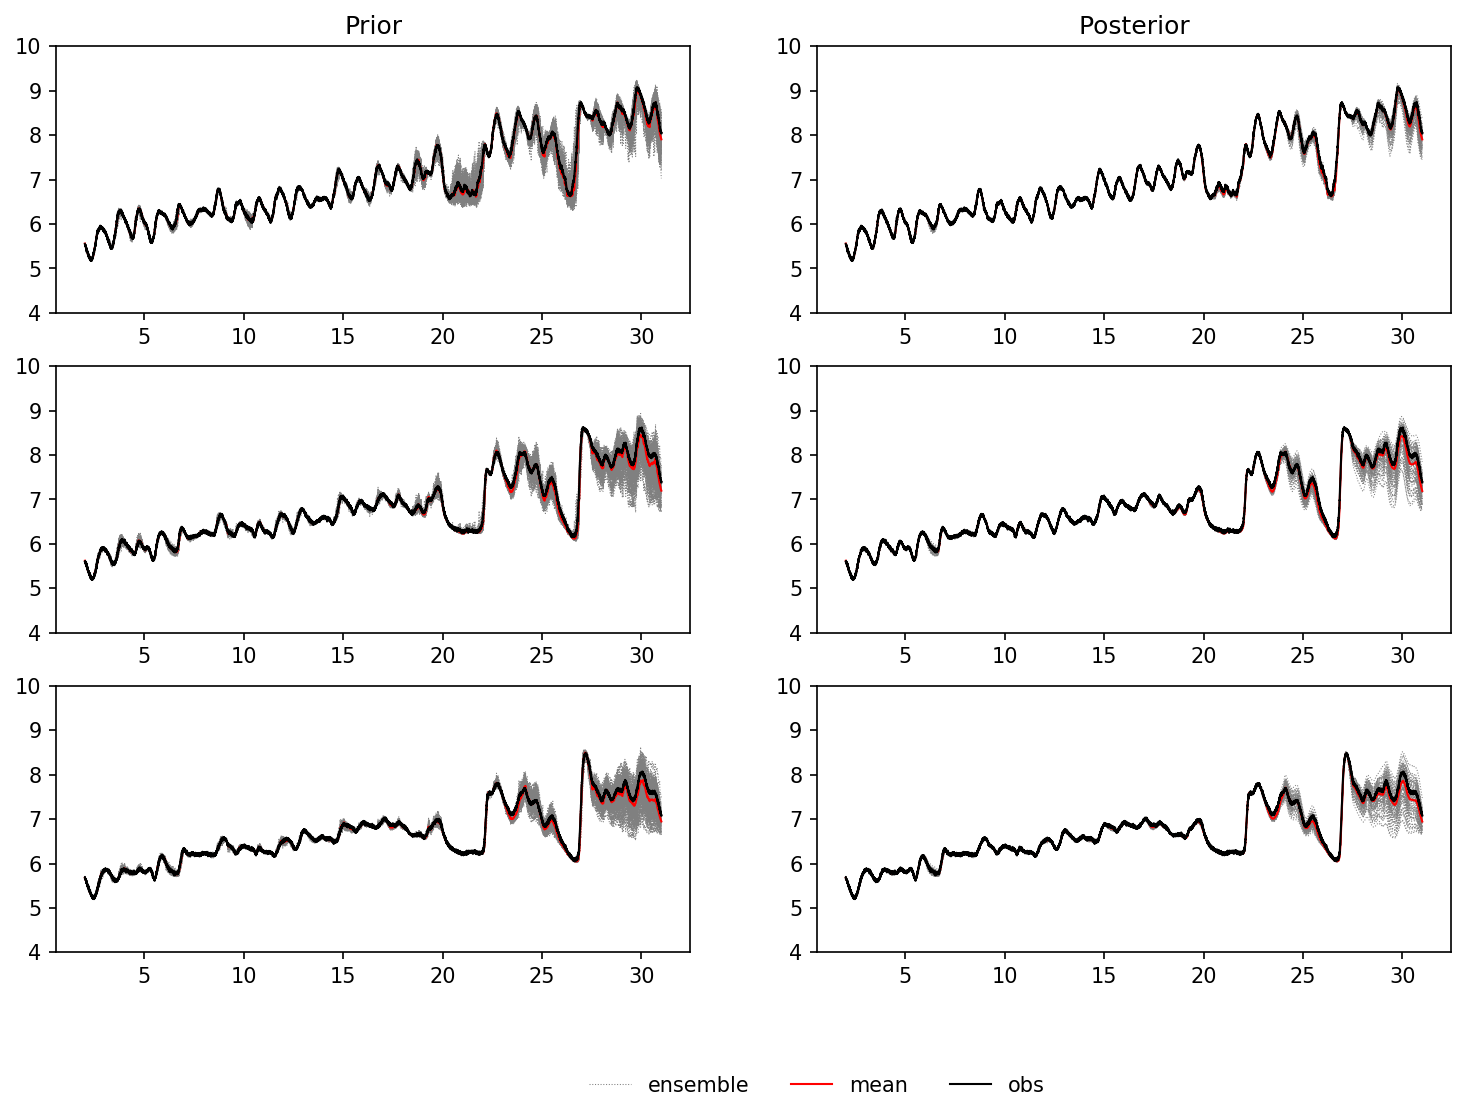

In [27]:
fig = plt.figure(num=1,dpi=150,figsize=(12,8),constrained_layout=True)
gs = gridspec.GridSpec(nloc_obs, 2, width_ratios=[1, 1])
for i in range(nloc_obs):
    axes = []
    axes.append(plt.subplot(gs[i,0]));axes.append(plt.subplot(gs[i,1]))
    line1, line2, line3 = dar.plot_obs_at_point('TEMPERATURE',axes,obs_loc_ind=i, plot_time_offset=plot_time_offset1,
                                               vmin=4, vmax=10, ylim=[4, 10])
    if i == 0: axes[0].set_title('Prior'); axes[1].set_title('Posterior')
plt.legend((line1, line2, line3), ('ensemble', 'mean', 'obs'),
           frameon=False, ncol=3, loc="center", bbox_to_anchor=(0.0, -0.5));
# plt.savefig(os.path.join(fig_dir, app_dir_name+"_temperature.png"), dpi=150)

# Compare the true with analyzed results

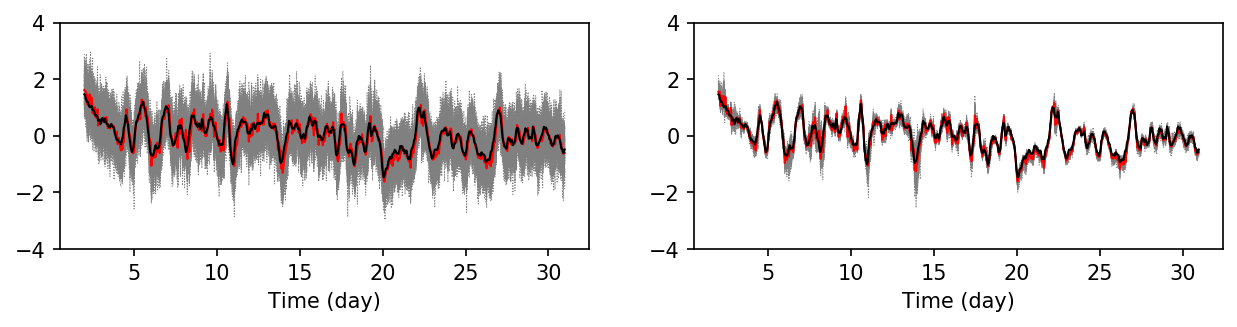

In [21]:
flux_file = os.path.join(app_dir, "pflotran_input/flux_1d_new.csv")
fig = plt.figure(num=1,dpi=150, figsize=(10,2), constrained_layout=False)
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], figure=fig)
axes = np.empty(2, dtype=object)
axes[0] = plt.subplot(gs[0, 0])
axes[1] = plt.subplot(gs[0, 1], sharey=axes[0], sharex=axes[0])
# fig, axes = plt.subplots(1, 2, figsize=(8,3), dpi=150, constrained_layout=True)
dar.compare_univar_spatial_average(var_name='FLOW_FLUX', true_file_name=flux_file, axes=axes, 
                                   plot_time_offset=48, ylim=[-4, 4])
# axes[1].set_xlim([8,9.5])
plt.subplots_adjust(wspace=0.2)
# plt.savefig(os.path.join(fig_dir, app_dir_name+"_flowflux.png"), dpi=150, bbox_inches='tight')

## Difference

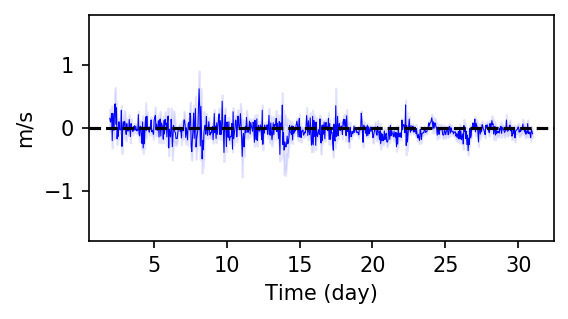

In [10]:
_, ax = plt.subplots(1, 1, figsize=(4,2), dpi=150)
diff_mean, posterior_mean, true_mean, true, true_time_set, true_set_dates = dar.compare_univar_spatial_average_diff(var_name='FLOW_FLUX', true_file_name=flux_file, ax=ax, 
                                        model_time_offset=0., ylim=[-1.8, 1.8], unit='m/s')
# plt.savefig(os.path.join(fig_dir, app_dir_name+"_flowflux_diff.png"), dpi=150, bbox_inches='tight')

## Bias and MAE

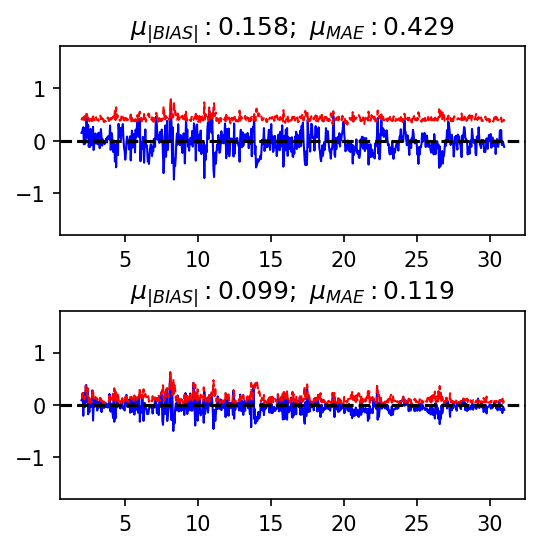

In [19]:
_, axes = plt.subplots(2, 1, figsize=(4,4), dpi=150)
biasline, maeline = dar.compare_univar_spatial_average_bias(var_name='FLOW_FLUX', true_file_name=flux_file, axes=axes, 
                                        model_time_offset=0., plot_time_offset=plot_time_offset2, ylim=[-1.8, 1.8], unit='m/s')
plt.subplots_adjust(hspace=0.4)
# plt.savefig(os.path.join(fig_dir, app_dir_name+"_flowflux_diff.png"), dpi=150, bbox_inches='tight')

## Variance

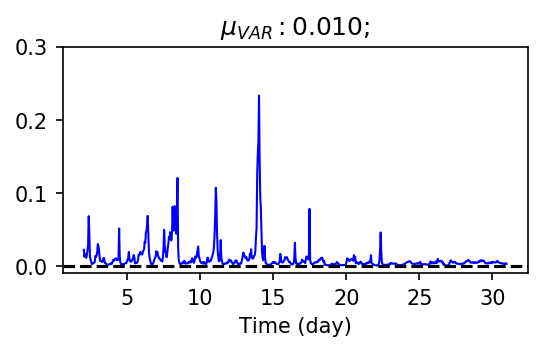

In [28]:
_, ax = plt.subplots(1, 1, figsize=(4,2), dpi=150)
varline = dar.compare_univar_spatial_average_variance(var_name='FLOW_FLUX', true_file_name=flux_file, ax=ax, 
                                                      model_time_offset=0., plot_time_offset=plot_time_offset2, ylim=[-.01, .3], unit='m/s')